# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = "output_data/cities.csv"



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
      

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gamba
Processing Record 2 of Set 1 | la'ie
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | kerikeri
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | mukhorshibir'
City not found. Skipping...
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | ulladulla
Processing Record 10 of Set 1 | dadukou
Processing Record 11 of Set 1 | novoorsk
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | krutinka
Processing Record 16 of Set 1 | kathmandu
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | pantai cenang
City not found. Skipping...
Processing Record 19 of Set 1 | chandbali
Processing Record 20 of Set 1 | cabo san lucas
Processing 

Processing Record 37 of Set 4 | bubaque
Processing Record 38 of Set 4 | la paz
Processing Record 39 of Set 4 | soligalich
Processing Record 40 of Set 4 | san antonio de pale
Processing Record 41 of Set 4 | bengkulu
Processing Record 42 of Set 4 | constantia
Processing Record 43 of Set 4 | toga village
City not found. Skipping...
Processing Record 44 of Set 4 | oranjemund
Processing Record 45 of Set 4 | trevelin
Processing Record 46 of Set 4 | chardara
Processing Record 47 of Set 4 | conception bay south
Processing Record 48 of Set 4 | gargalianoi
Processing Record 49 of Set 4 | vangaindrano
Processing Record 0 of Set 5 | ipora
Processing Record 1 of Set 5 | petawawa
Processing Record 2 of Set 5 | fuvahmulah
City not found. Skipping...
Processing Record 3 of Set 5 | kachug
Processing Record 4 of Set 5 | hami
Processing Record 5 of Set 5 | amarpur
Processing Record 6 of Set 5 | mbekenyera
Processing Record 7 of Set 5 | diego de almagro
Processing Record 8 of Set 5 | kirensk
Processing Re

Processing Record 30 of Set 8 | vallegrande
Processing Record 31 of Set 8 | sovetskiy
Processing Record 32 of Set 8 | shenjiamen
Processing Record 33 of Set 8 | aoulef
Processing Record 34 of Set 8 | riverton
Processing Record 35 of Set 8 | mauganj
Processing Record 36 of Set 8 | new norfolk
Processing Record 37 of Set 8 | praya
Processing Record 38 of Set 8 | cartagena
Processing Record 39 of Set 8 | sitka
Processing Record 40 of Set 8 | orcopampa
Processing Record 41 of Set 8 | port moresby
Processing Record 42 of Set 8 | mahina
Processing Record 43 of Set 8 | ribeira brava
Processing Record 44 of Set 8 | marysville
Processing Record 45 of Set 8 | assare
Processing Record 46 of Set 8 | jangaon
Processing Record 47 of Set 8 | waterville
Processing Record 48 of Set 8 | dahab
Processing Record 49 of Set 8 | grantsville
Processing Record 0 of Set 9 | charata
Processing Record 1 of Set 9 | timimoun
Processing Record 2 of Set 9 | puerto aysen
Processing Record 3 of Set 9 | sarandi
Processi

Processing Record 18 of Set 12 | fannuj
City not found. Skipping...
Processing Record 19 of Set 12 | marsh harbour
Processing Record 20 of Set 12 | bejubang dua
City not found. Skipping...
Processing Record 21 of Set 12 | el nido
Processing Record 22 of Set 12 | mersch
Processing Record 23 of Set 12 | lorengau
Processing Record 24 of Set 12 | scottsboro
Processing Record 25 of Set 12 | dryden
Processing Record 26 of Set 12 | santana
Processing Record 27 of Set 12 | taroa
Processing Record 28 of Set 12 | lerwick
Processing Record 29 of Set 12 | guerrero negro
Processing Record 30 of Set 12 | kiunga
Processing Record 31 of Set 12 | cannonvale
Processing Record 32 of Set 12 | bunbury
Processing Record 33 of Set 12 | bisalpur
Processing Record 34 of Set 12 | de aar
Processing Record 35 of Set 12 | san rafael
Processing Record 36 of Set 12 | chulakkurgan
Processing Record 37 of Set 12 | enriquillo
Processing Record 38 of Set 12 | madimba
Processing Record 39 of Set 12 | saint-pierre
Process

In [4]:
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gamba,-2.6500,10.0000,22.91,84,59,3.78,GA,1690389111
1,la'ie,21.6477,-157.9253,25.98,76,59,6.47,US,1690389111
2,port-aux-francais,-49.3500,70.2167,5.30,85,93,19.42,TF,1690389057
3,kerikeri,-35.2268,173.9474,9.62,80,51,2.84,NZ,1690389089
4,georgetown,5.4112,100.3354,28.96,89,20,1.54,MY,1690388834


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gamba,-2.6500,10.0000,22.91,84,59,3.78,GA,1690389111
1,la'ie,21.6477,-157.9253,25.98,76,59,6.47,US,1690389111
2,port-aux-francais,-49.3500,70.2167,5.30,85,93,19.42,TF,1690389057
3,kerikeri,-35.2268,173.9474,9.62,80,51,2.84,NZ,1690389089
4,georgetown,5.4112,100.3354,28.96,89,20,1.54,MY,1690388834


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

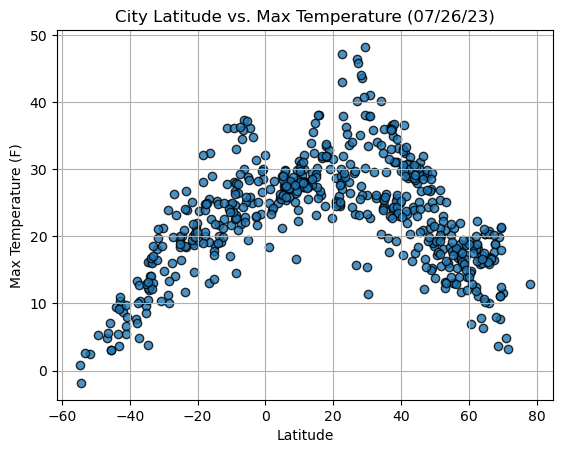

In [9]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

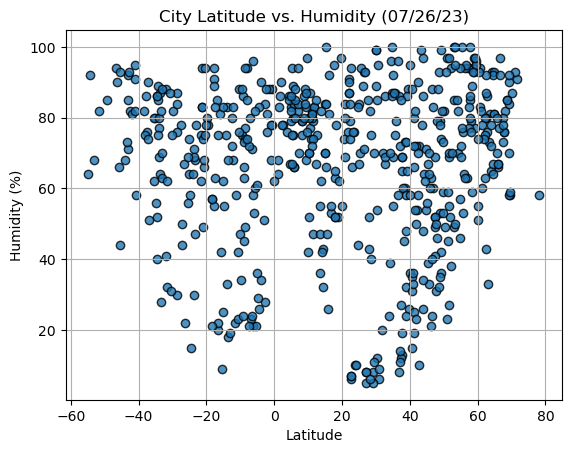

In [10]:
# Build the scatter plots for latitude vs. humidity
lats = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

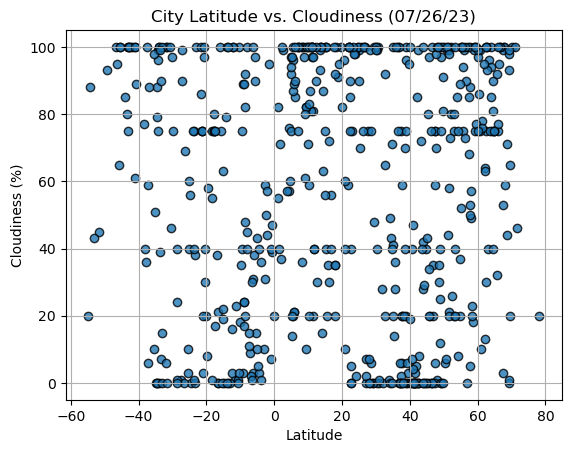

In [11]:
# Build the scatter plots for latitude vs. cloudiness
lats = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

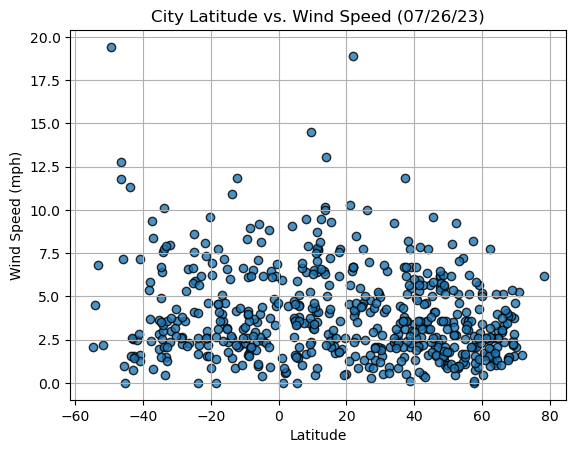

In [12]:
# Build the scatter plots for latitude vs. wind speed
lats = city_data_df["Lat"]
wind_sp = city_data_df["Wind Speed"]

plt.scatter(lats, 
            wind_sp,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_reg(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,la'ie,21.6477,-157.9253,25.98,76,59,6.47,US,1690389111
4,georgetown,5.4112,100.3354,28.96,89,20,1.54,MY,1690388834
8,dadukou,26.5479,101.7054,23.26,93,100,0.90,CN,1690389112
9,novoorsk,51.3810,58.9813,25.36,45,44,3.55,RU,1690389112
12,krutinka,56.0055,71.5113,17.92,64,99,3.03,RU,1690389113


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gamba,-2.6500,10.0000,22.91,84,59,3.78,GA,1690389111
2,port-aux-francais,-49.3500,70.2167,5.30,85,93,19.42,TF,1690389057
3,kerikeri,-35.2268,173.9474,9.62,80,51,2.84,NZ,1690389089
5,bredasdorp,-34.5322,20.0403,10.46,86,88,2.52,ZA,1690389057
6,puerto natales,-51.7236,-72.4875,2.40,82,45,2.19,CL,1690389056


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3658577950321934


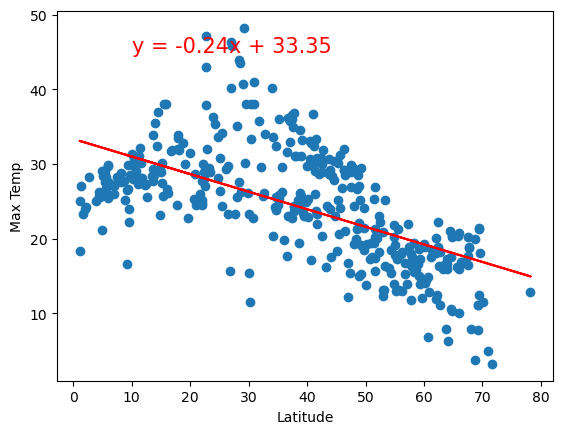

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_reg(x_values, y_values, 'Max Temp',(10,45))

The r-value is: 0.7276157073480178


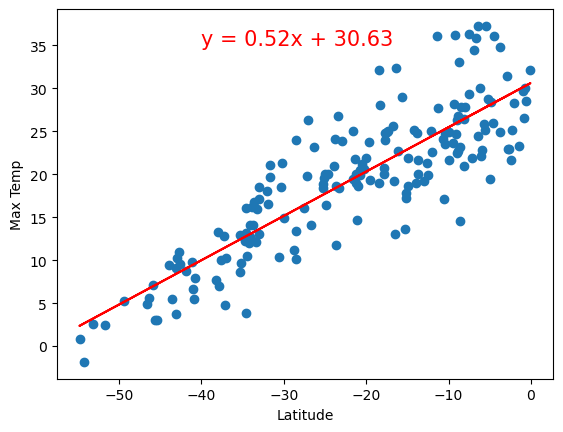

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_reg(x_values, y_values, 'Max Temp', (-40,35))

**Discussion about the linear relationship:** A high positive r value (close to +1) indicates a strong positive correlation between two variables. In the context of latitude and max temperature, it means that as you move closer to the equator (lower latitudes), the maximum temperature tends to increase.An r value around 0.5 does indicate a moderate positive correlation. It means that there is a noticeable tendency for the variables to move together, but the relationship is not as strong as in the case of a high r value.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0008354450767498891


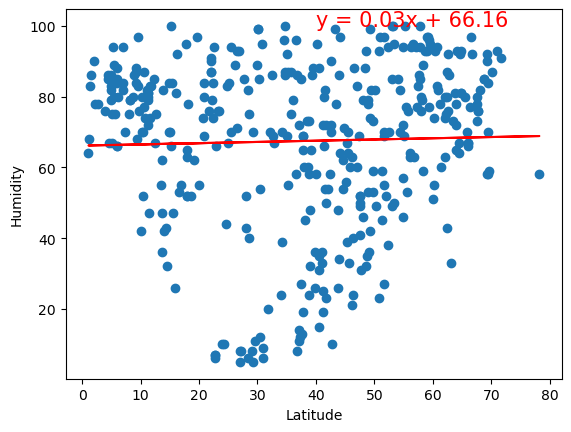

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_reg(x_values, y_values, 'Humidity',(40,100))

The r-value is: 0.058744265906208536


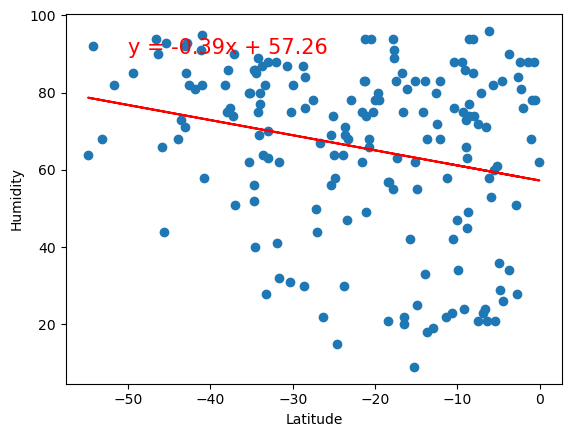

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_reg(x_values, y_values, 'Humidity', (-50,90))

**Discussion about the linear relationship:** In the context of humidity and latitude, a low r value suggests that there is little to no linear relationship between the two. It means that changes in latitude (moving closer to or farther from the equator) are not strongly associated with changes in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.005525402964590883


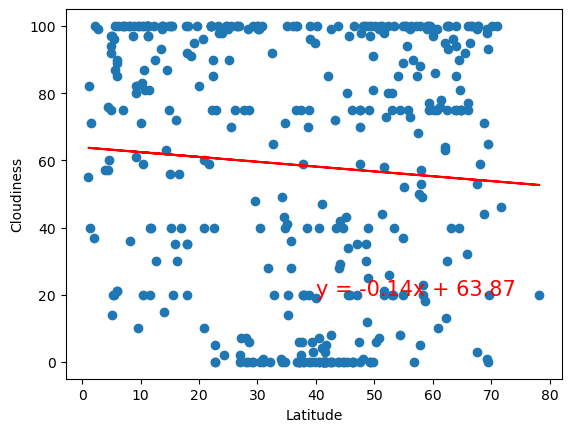

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_reg(x_values, y_values, 'Cloudiness', (40,20))

The r-value is: 0.10290148116282002


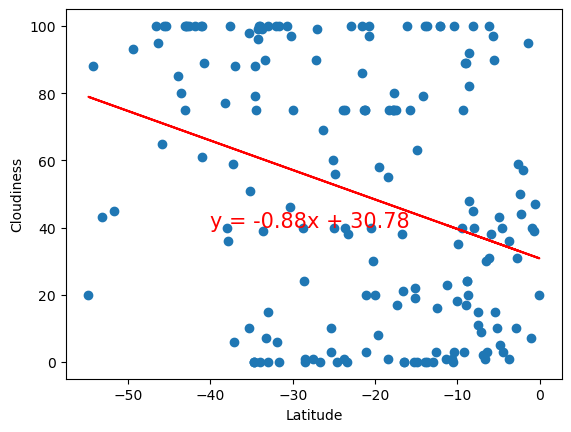

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_reg(x_values, y_values, 'Cloudiness', (-40,40))

**Discussion about the linear relationship:** A low positive r value, in the range of 0 to 0.3, would suggest a weak positive relationship. This means that as latitude increases (moving away from the equator), there may be a slight tendency for cloudiness to increase, but the relationship is not strong.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05046481467679088


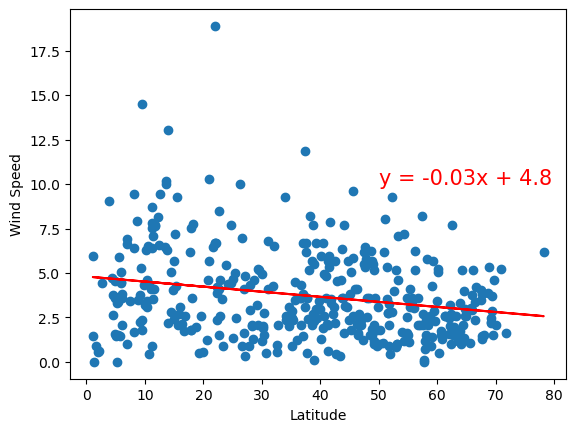

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_reg(x_values, y_values, 'Wind Speed', (50,10))

The r-value is: 0.05046481467679088


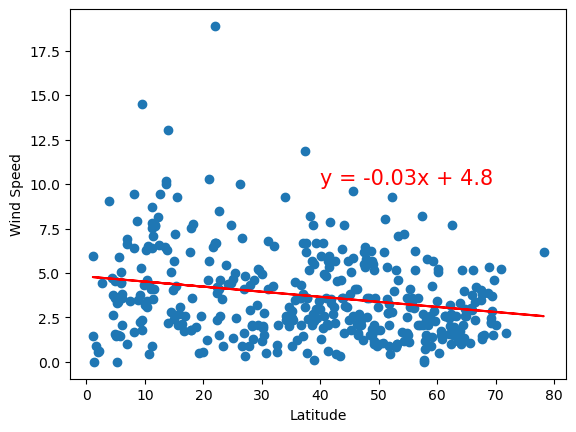

In [57]:
# Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_reg(x_values, y_values, 'Wind Speed', (40,10))

**Discussion about the linear relationship:** A low correlation coefficient (r value close to 0) between wind speed and latitude indicates that there is little to no linear relationship between the two variables. This means that changes in latitude (moving closer to or farther from the equator) are not strongly associated with changes in wind speed. Additionally, if there is no significant difference in the relationship between wind speed and latitude in the two hemispheres, it further supports the notion that latitude is not a determining factor in predicting wind speed.